2026-01-31 14:59:35,083 [INFO] gridflo.supergraph: Creating nodes...
2026-01-31 14:59:35,084 [INFO] gridflo.supergraph: => 41 temperature combinations
2026-01-31 14:59:35,084 [INFO] gridflo.supergraph: => 378 thermocline combinations
2026-01-31 14:59:35,094 [INFO] gridflo.supergraph: => Created a total of 15498 nodes


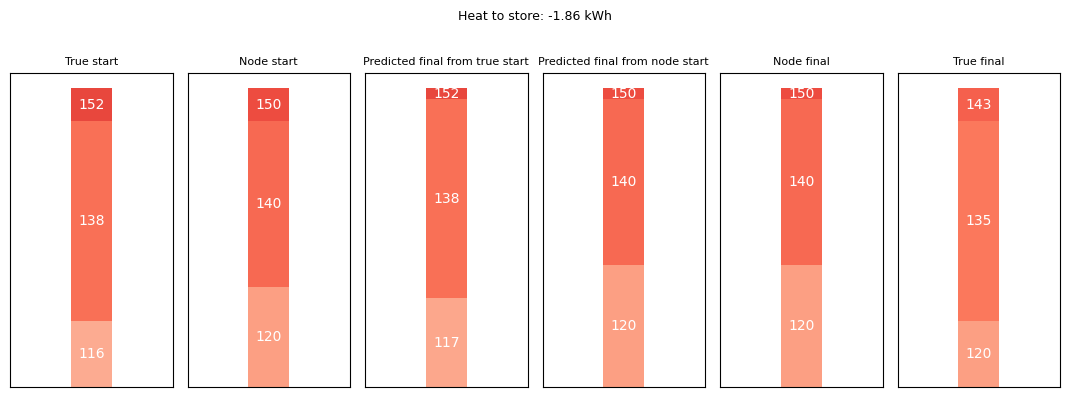

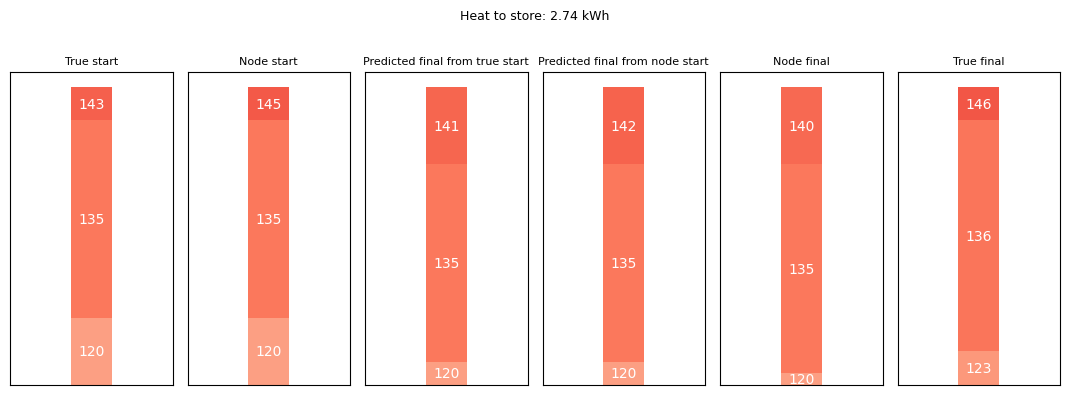

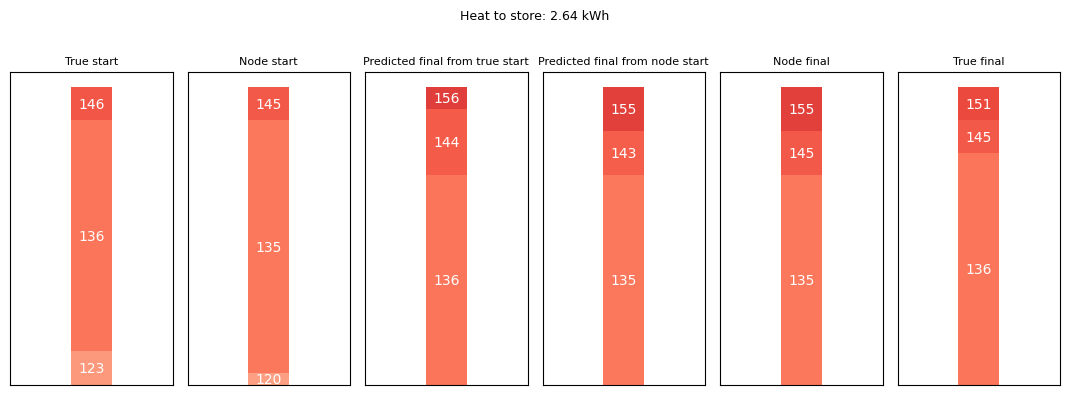

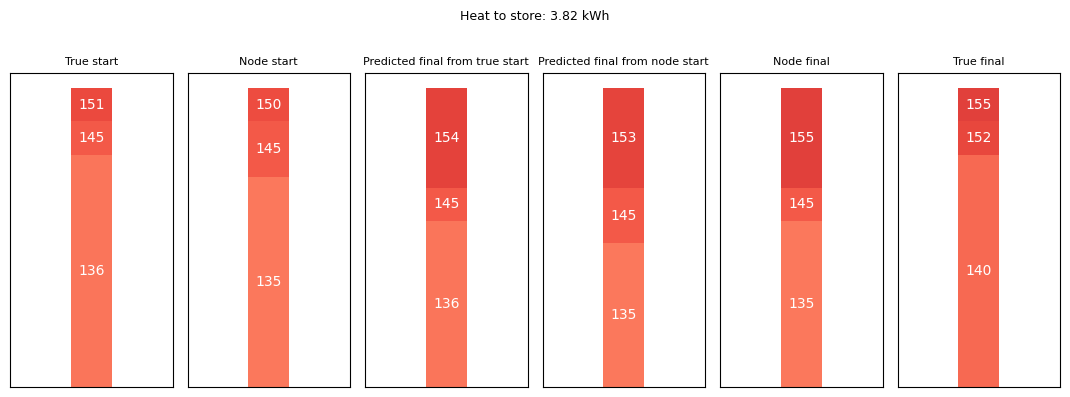

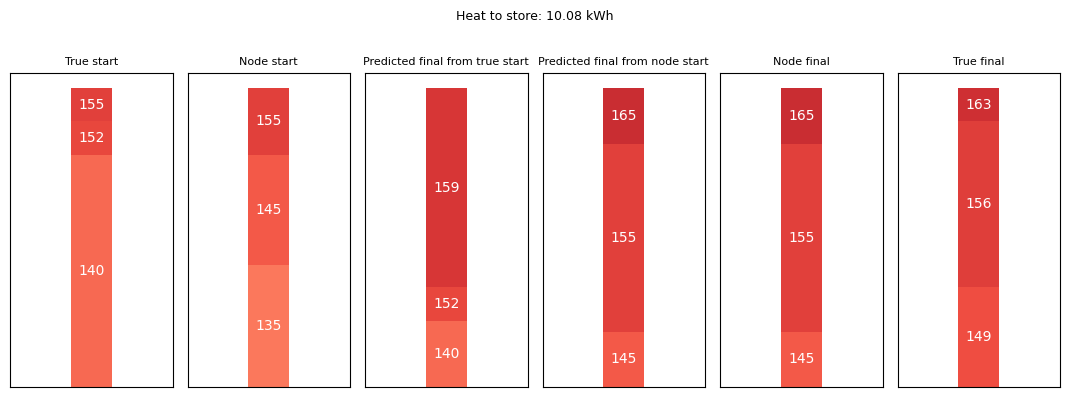

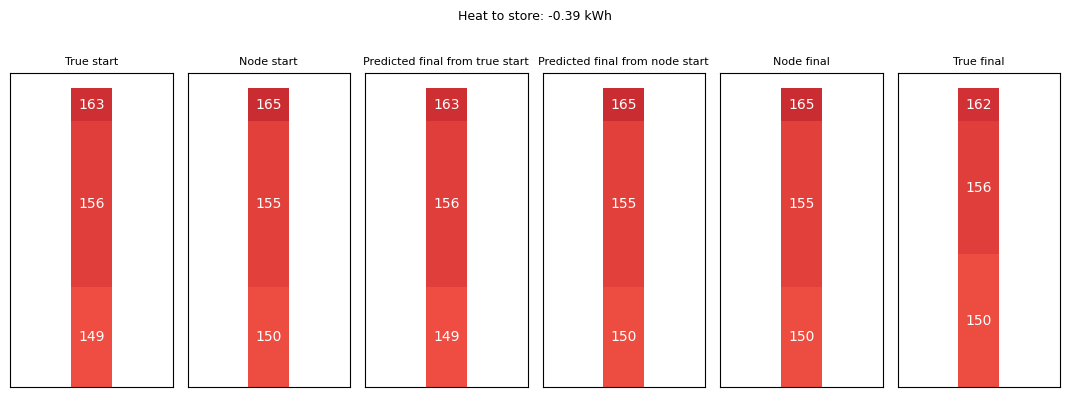

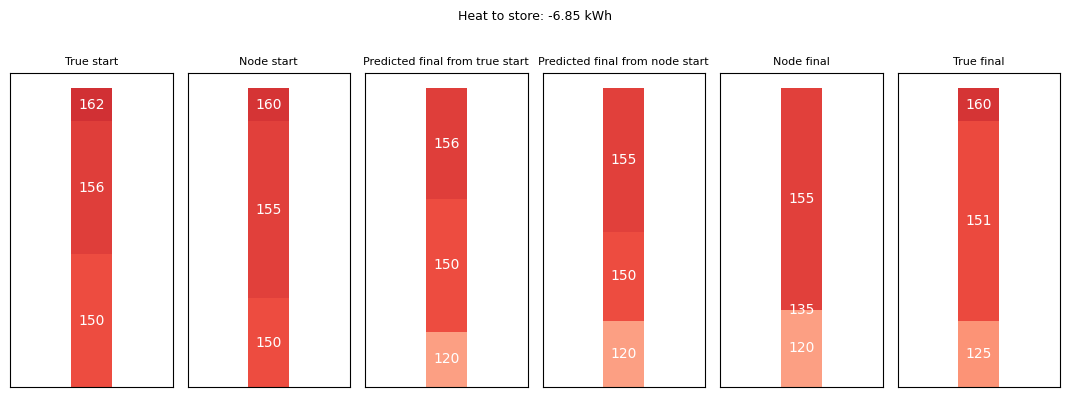

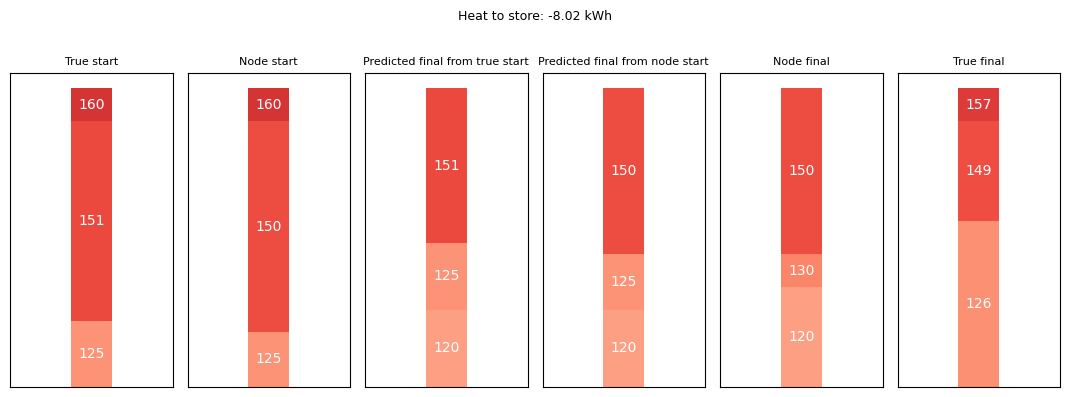

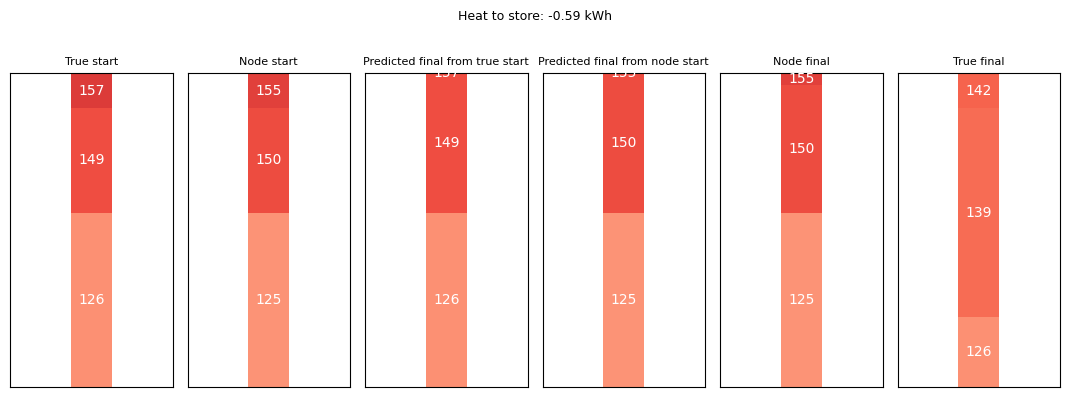

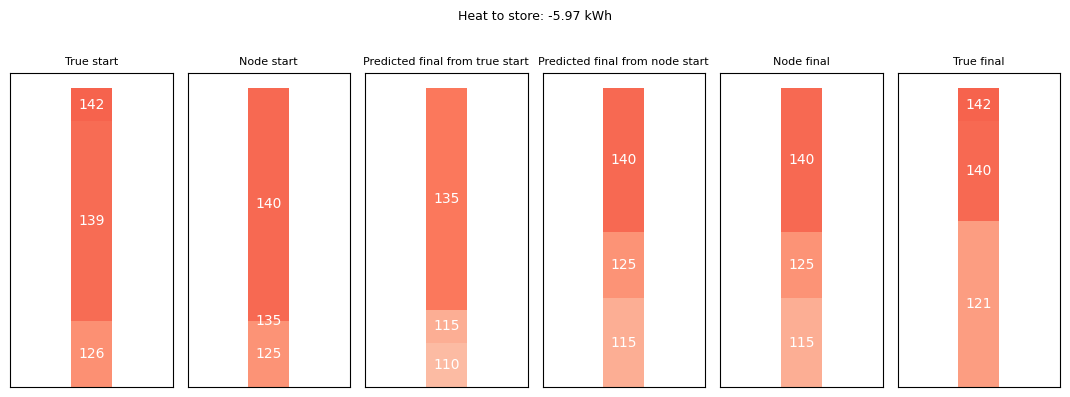

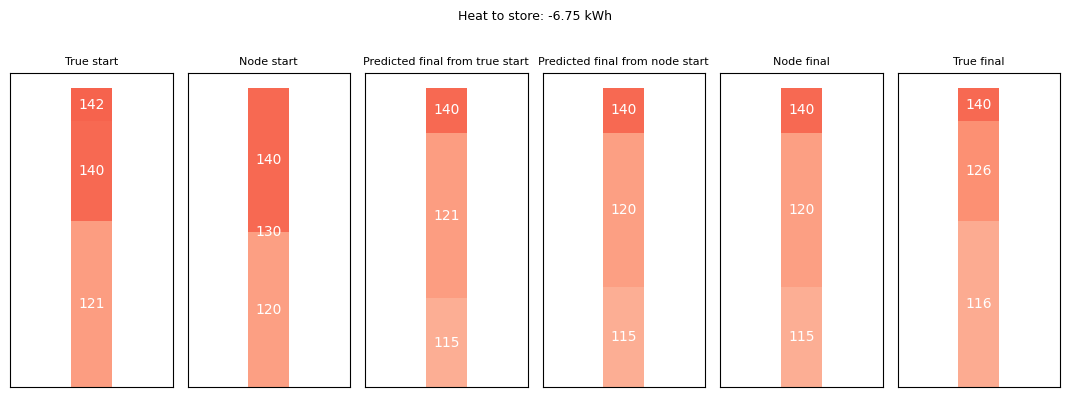

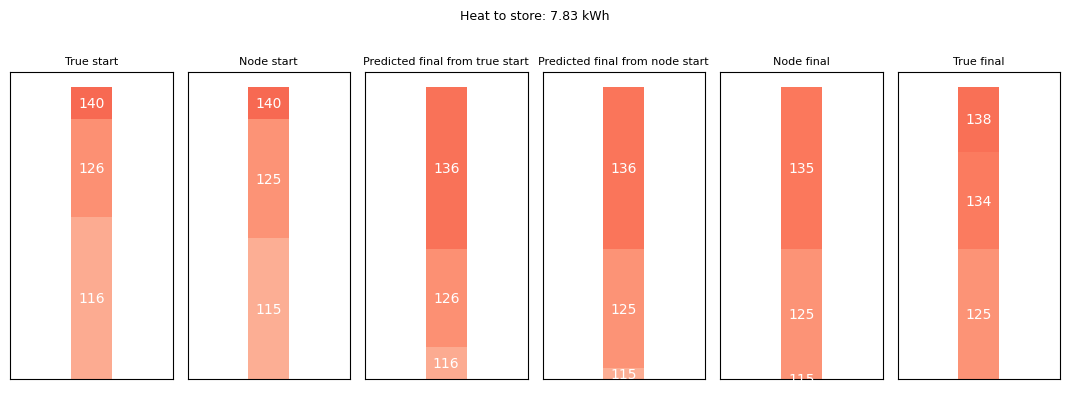

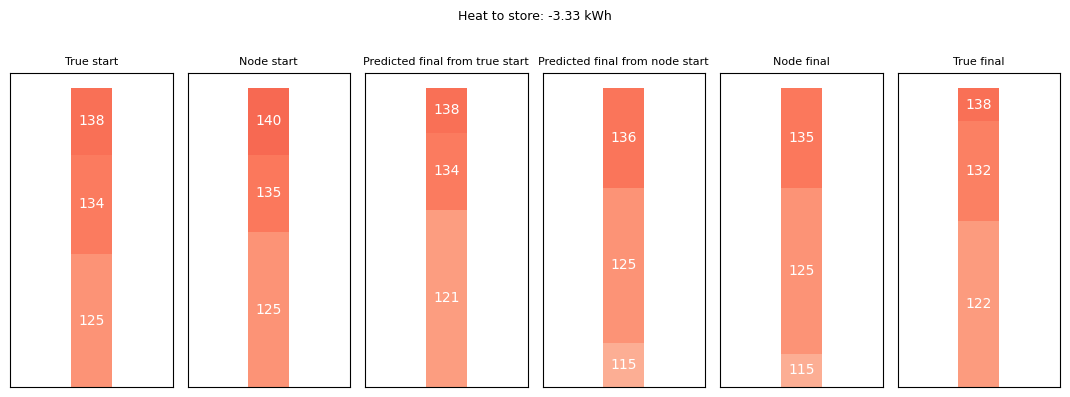

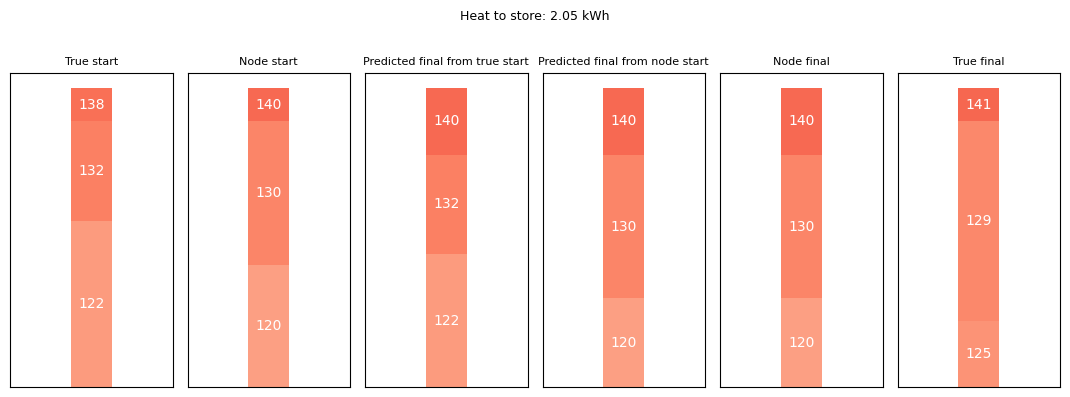

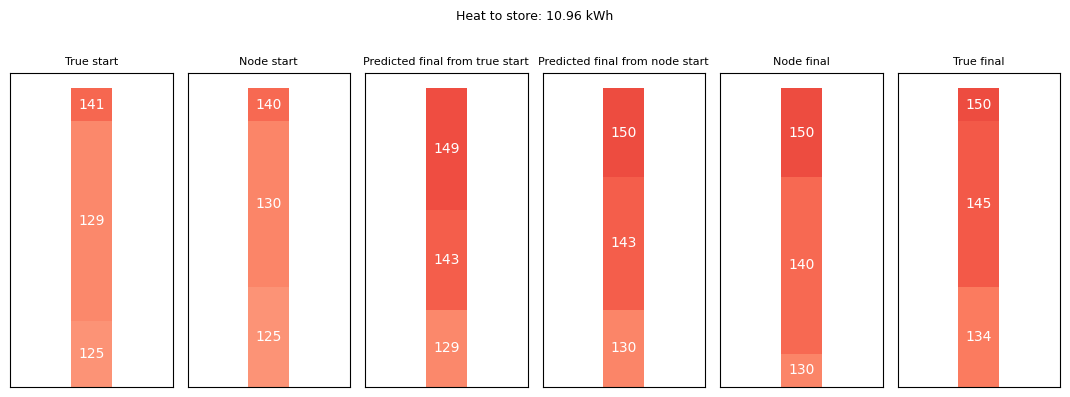

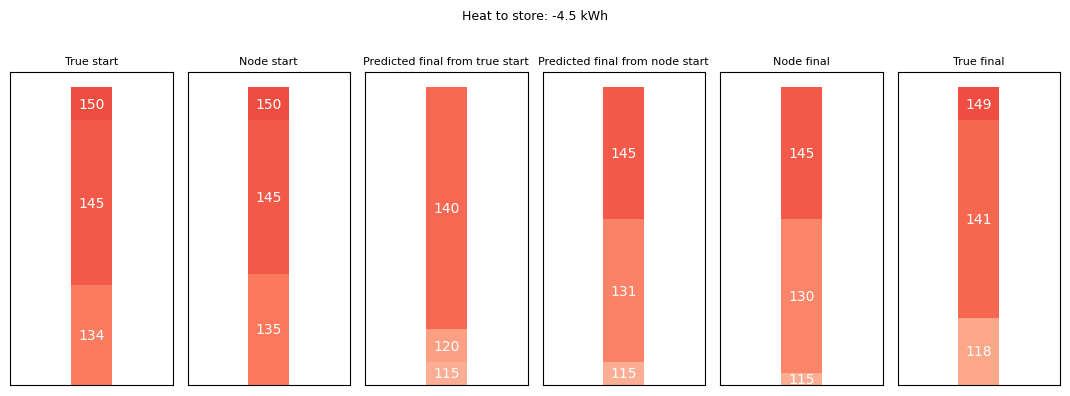

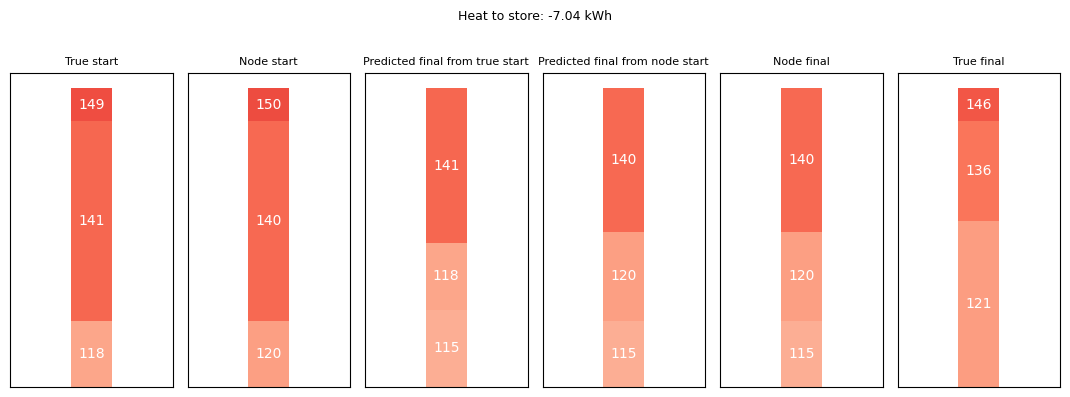

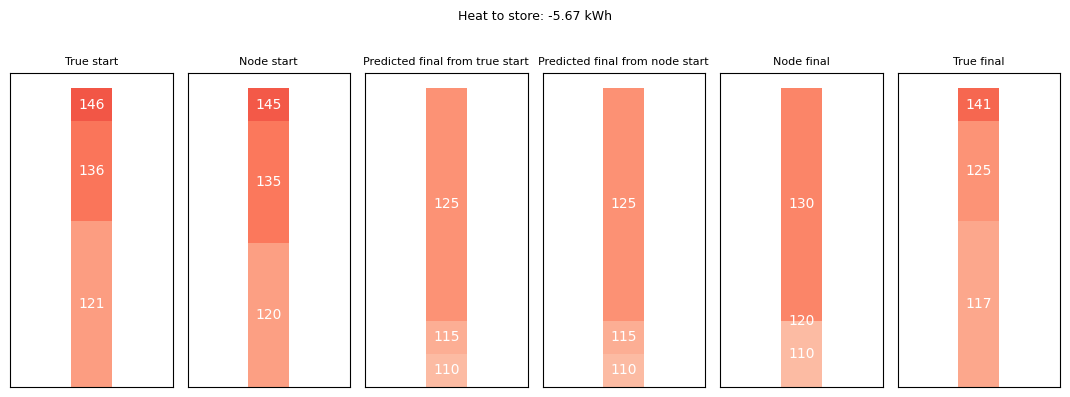

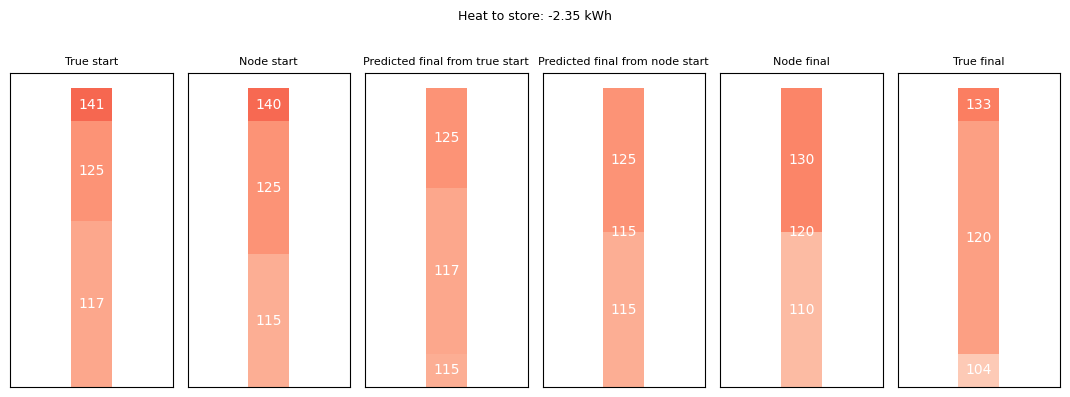

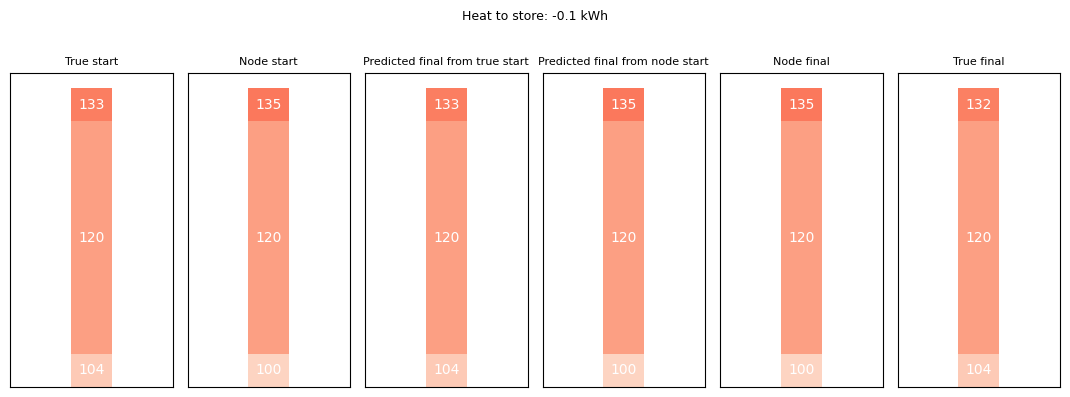

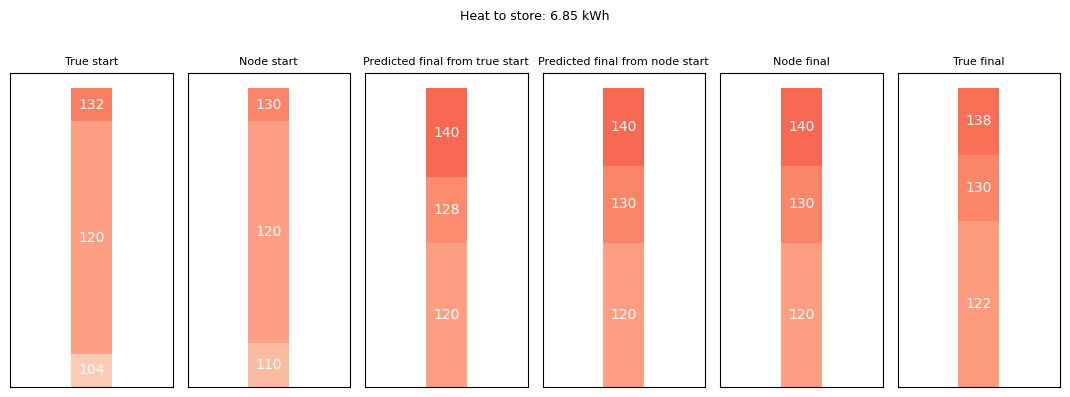

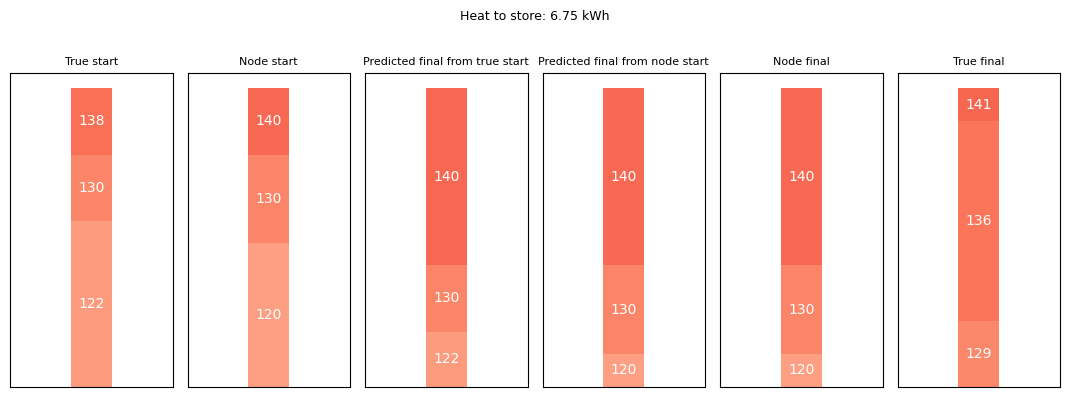

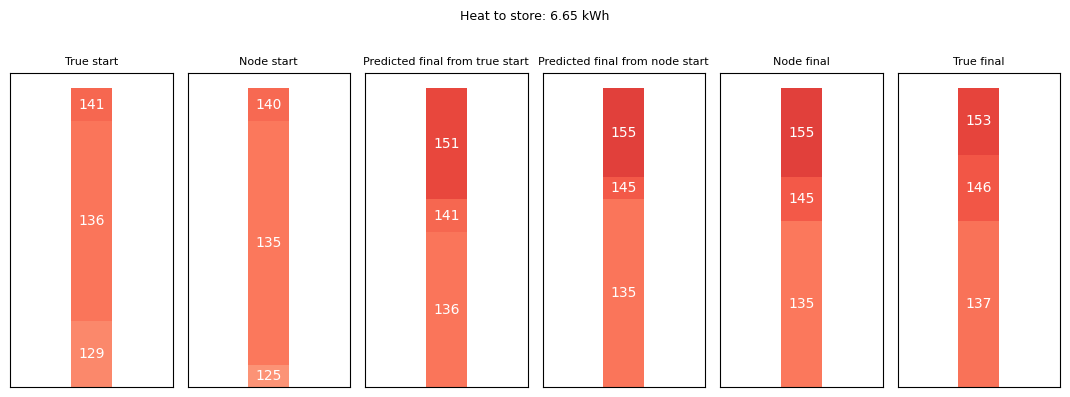

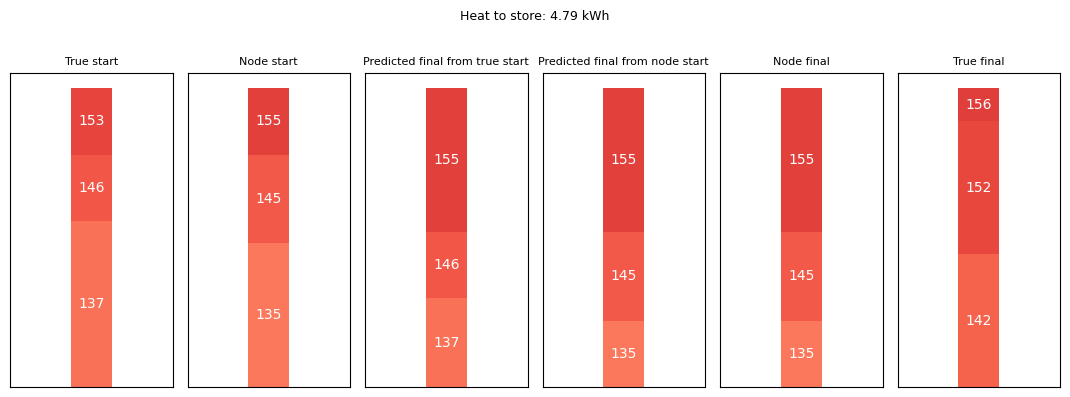

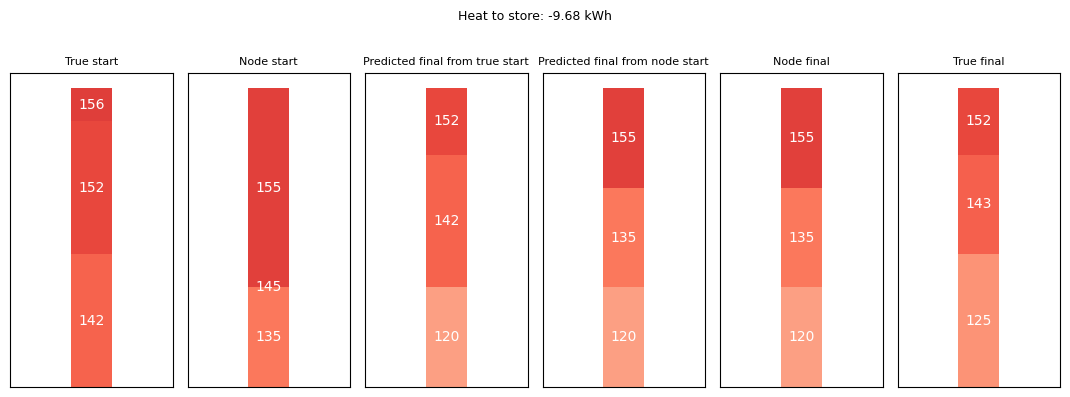

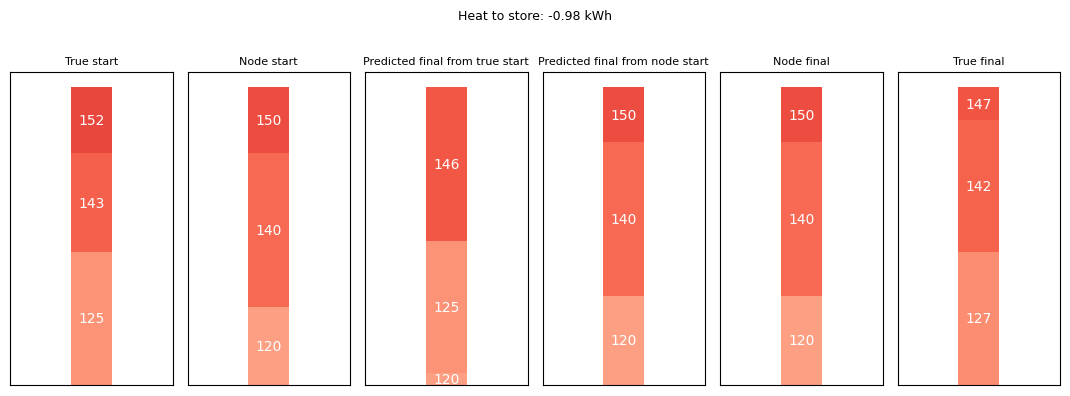

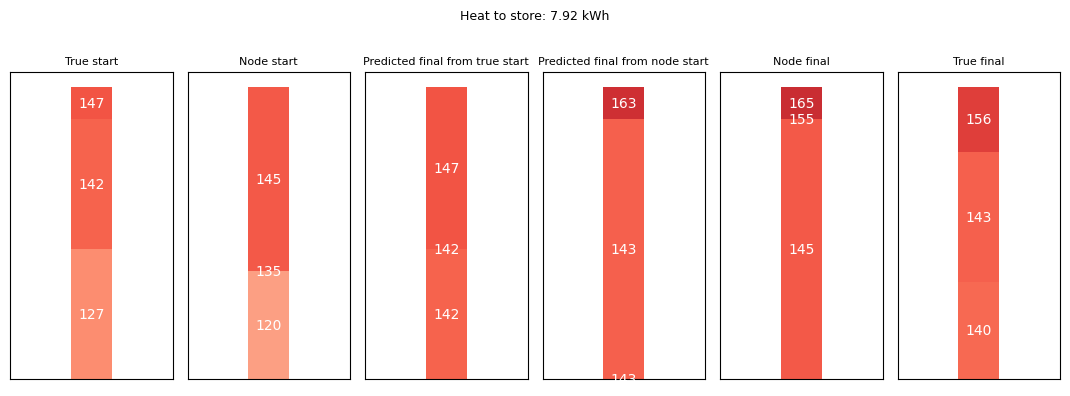

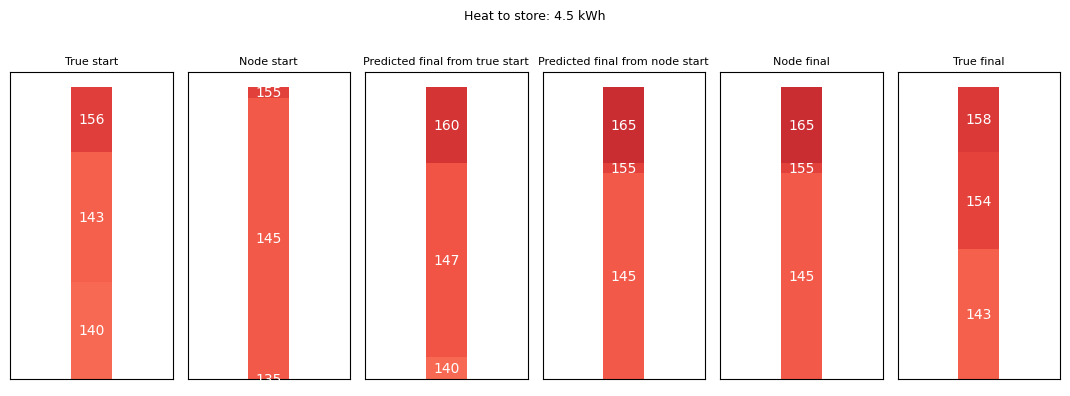

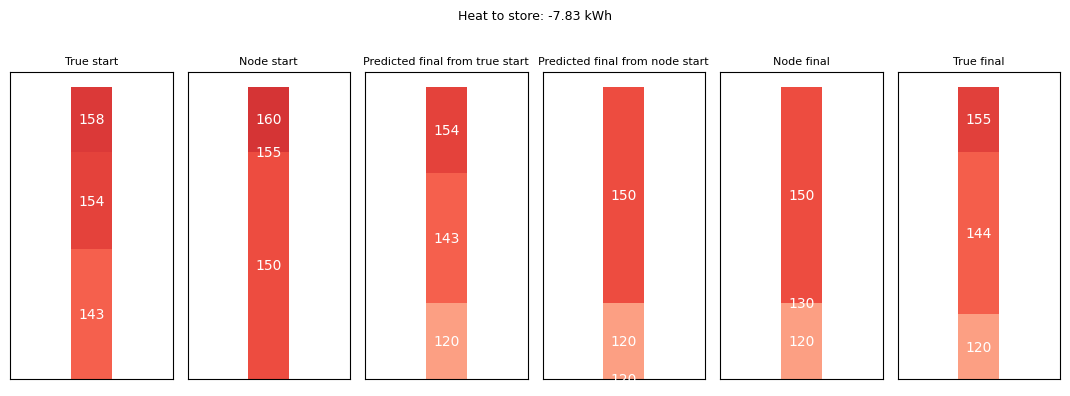

In [1]:
from gridflo.supergraph_generator import SupergraphGenerator, RuleBasedStorageModel
from gridflo.supergraph_generator import WinterOakSupergraphParams
from gridflo.dgraph_visualizer import DNodeComparator
import pickle

with open("true_initial_states.pkl", "rb") as f:
    true_initial_states = pickle.load(f)
with open("true_final_states.pkl", "rb") as f:
    true_final_states = pickle.load(f)
with open("heat_to_store_true.pkl", "rb") as f:
    heat_to_store_true = pickle.load(f)
with open("flo_params_messages.pkl", "rb") as f:
    flo_params_messages = pickle.load(f)

params = WinterOakSupergraphParams(
    num_layers=27,
    storage_volume_gallons=360,
    hp_max_elec_kw=11.0,
    cop_intercept=1.02,
    cop_oat_coeff=0.0257,
    cop_min=1.4,
    cop_min_oat_f=15.0,
    constant_delta_t=20
)

generator = SupergraphGenerator(params)
generator.create_nodes()

model = RuleBasedStorageModel(
    params,
    generator.nodes,
    generator.nodes_by,
    generator.logger
)

for i in range(1, len(flo_params_messages)-1):
    start_node = generator.find_closest_node(true_initial_states[i])
    predicted_end_state_from_true = model.next_node(true_initial_states[i], heat_to_store_true[i])
    predicted_end_state_from_node = model.next_node(start_node, heat_to_store_true[i])
    end_node = generator.find_closest_node(predicted_end_state_from_node)
    DNodeComparator(
        nodes = [
            true_initial_states[i], 
            start_node, 
            predicted_end_state_from_true,
            predicted_end_state_from_node, 
            end_node, 
            true_final_states[i], 
        ],
        titles = [
            'True start',
            'Node start',
            'Predicted final from true start',
            'Predicted final from node start',
            'Node final',
            'True final',
        ],
        heat_to_store = heat_to_store_true[i]
    ).plot()
